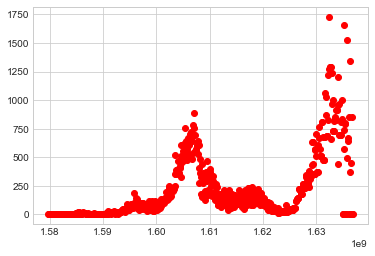

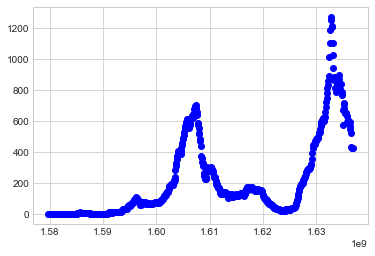

In [4]:
import numpy as np
import csv
import time
from datetime import datetime

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

def readTrendDataFromCSV(file):
    # Read CSV and delete label rows/columns
    reader = csv.reader(open(file))
    data = list(reader)
    del data[0:3]
    data = np.array(data)
    data = np.delete(data, 0, 1)

    # Convert string dates to Unix timestamps for easy plotting
    for entry in data:
        eDateTime = datetime.strptime(entry[0], '%b %d %Y')
        entry[0] = int(time.mktime(eDateTime.timetuple()))
        if (entry[3] == ("N/A")):
            entry[3] = 0

    # Cast entire array to integer type
    return data.astype(np.float64)

plt.figure(0)
# Plot loaded trend data (x is Unix timestamp, Y is new case number)
alaskaCases = readTrendDataFromCSV('data_table_for_daily_case_trends__alaska.csv')
plt.plot(alaskaCases[:, 0], alaskaCases[:, 2], 'ro') #7 day avg cases

plt.figure(1)
plt.plot(alaskaCases[:, 0], alaskaCases[:, 3], 'bo') #7 day avg vaccination

#.figure(1)
# Plot loaded trend data (x is Unix timestamp, Y is new case number)
#californiaCases = readTrendDataFromCSV('data_table_for_daily_case_trends__california.csv')
#plt.plot(californiaCases[:, 0], californiaCases[:, 1], 'bo')

#plt.figure(2)
# Plot loaded trend data (x is Unix timestamp, Y is new case number)
#floridaCases = readTrendDataFromCSV('data_table_for_daily_case_trends__florida.csv')
#plt.plot(floridaCases[:, 0], floridaCases[:, 1], 'mo')

#plt.figure(3)
# Plot loaded trend data (x is Unix timestamp, Y is new case number)
#virginiaCases = readTrendDataFromCSV('data_table_for_daily_case_trends__virginia.csv')
#plt.plot(virginiaCases[:, 0], virginiaCases[:, 1], 'co')

#plt.figure(4)
# Plot loaded trend data (x is Unix timestamp, Y is new case number)
#marylandCases = readTrendDataFromCSV('data_table_for_daily_case_trends__maryland.csv')
#plt.plot(marylandCases[:, 0], marylandCases[:, 1], 'yo')

#plt.figure(5)
# Plot loaded trend data (x is Unix timestamp, Y is new case number)
#pennsylvaniaCases = readTrendDataFromCSV('data_table_for_daily_case_trends__pennsylvania.csv')
#plt.plot(pennsylvaniaCases[:, 0], pennsylvaniaCases[:, 1], 'co')

#plt.figure(6)
# Plot loaded trend data (x is Unix timestamp, Y is new case number)
#ohioCases = readTrendDataFromCSV('data_table_for_daily_case_trends__ohio.csv')
#plt.plot(ohioCases[:, 0], ohioCases[:, 1], 'bo')

#plt.figure(7)
# Plot loaded trend data (x is Unix timestamp, Y is new case number)
#floridaCases = readTrendDataFromCSV('data_table_for_daily_case_trends__florida.csv')
#plt.plot(floridaCases[:, 0], floridaCases[:, 1], 'mo')

#plt.figure(8)
# Plot loaded trend data (x is Unix timestamp, Y is new case number)
#virginiaCases = readTrendDataFromCSV('data_table_for_daily_case_trends__virginia.csv')
#plt.plot(virginiaCases[:, 0], virginiaCases[:, 1], 'co')

#plt.figure(9)
# Plot loaded trend data (x is Unix timestamp, Y is new case number)
#marylandCases = readTrendDataFromCSV('data_table_for_daily_case_trends__maryland.csv')
#plt.plot(marylandCases[:, 0], marylandCases[:, 1], 'yo')

#plt.figure(10)
# Plot loaded trend data (x is Unix timestamp, Y is new case number)
#pennsylvaniaCases = readTrendDataFromCSV('data_table_for_daily_case_trends__pennsylvania.csv')
#plt.plot(pennsylvaniaCases[:, 0], pennsylvaniaCases[:, 1], 'co')

In [3]:
# Create sets of 10 input data points and 1 output data point
# (model predicts the next case number given 10 previous case counts)
dataTimestamps = []
dataCuratedX = []
dataCuratedY = []
vaccinatedY = []

for index, entry in enumerate(alaskaCases):
    if index + 40 < len(alaskaCases):
        dataTimestamps.append(alaskaCases[index, 0])
        dataCuratedX.append(alaskaCases[index+1:index+41, 2])
        dataCuratedY.append(alaskaCases[index, 2])
        vaccinatedY.append(alaskaCases[index, 3])
        
#for index, entry in enumerate(californiaCases):
#    if index + 40 < len(californiaCases):
#        dataTimestamps.append(californiaCases[index, 0])
#        dataCuratedX.append(californiaCases[index+1:index+41, 2])
#        dataCuratedY.append(californiaCases[index, 2])
        
#for index, entry in enumerate(floridaCases):
#    if index + 40 < len(floridaCases):
#        dataTimestamps.append(floridaCases[index, 0])
#        dataCuratedX.append(floridaCases[index+1:index+41, 2])
#        dataCuratedY.append(floridaCases[index, 2])
        
#for index, entry in enumerate(virginiaCases):
#    if index + 40 < len(virginiaCases):
#        dataTimestamps.append(virginiaCases[index, 0])
#        dataCuratedX.append(virginiaCases[index+1:index+41, 2])
#        dataCuratedY.append(virginiaCases[index, 2])
        
#for index, entry in enumerate(marylandCases):
#    if index + 40 < len(marylandCases):
#        dataTimestamps.append(marylandCases[index, 0])
#        dataCuratedX.append(marylandCases[index+1:index+41, 2])
#        dataCuratedY.append(marylandCases[index, 2])
        
#for index, entry in enumerate(pennsylvaniaCases):
#    if index + 40 < len(pennsylvaniaCases):
#        dataTimestamps.append(pennsylvaniaCases[index, 0])
#        dataCuratedX.append(pennsylvaniaCases[index+1:index+41, 2])
#        dataCuratedY.append(pennsylvaniaCases[index, 2])
        
dataCuratedX = np.array(dataCuratedX)
        
# Split training and test data
trainingSplitIndex = round(len(dataCuratedX) * 0.3)
dataTrainingTimestamps = dataTimestamps[trainingSplitIndex:]
dataTrainingX = np.asarray(dataCuratedX[trainingSplitIndex:])
dataTrainingY = np.asarray(dataCuratedY[trainingSplitIndex:])
vaccinatedTrainingY = np.asarray(vaccinatedY[trainingSplitIndex:])
dataTestTimestamps = dataTimestamps[:trainingSplitIndex]
dataTestX = np.asarray(dataCuratedX[:trainingSplitIndex])
dataTestY = np.asarray(dataCuratedY[:trainingSplitIndex])
vaccinatedTestY = np.asarray(vaccinatedY[:trainingSplitIndex])

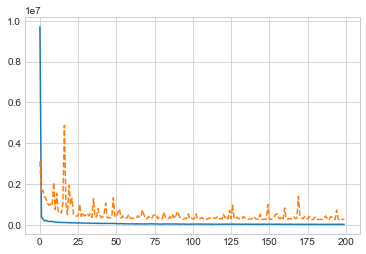

In [8]:
# Build and train model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(10, activation="relu"))
model.add(layers.Dense(5, activation="relu"))
model.add(layers.Dense(1))

model.compile(
    optimizer=keras.optimizers.RMSprop(),
    loss='mean_squared_error'
)

epochs = 200

history = model.fit(dataTrainingX, dataTrainingY,
    epochs=epochs,
    validation_data=(dataTestX, dataTestY),
    verbose=0
)

# Plot loss
hLoss = history.history['loss']
hVLoss = history.history['val_loss']
plt.plot(range(epochs), hLoss, '-', range(epochs), hVLoss, '--')

Model vs training data (error)


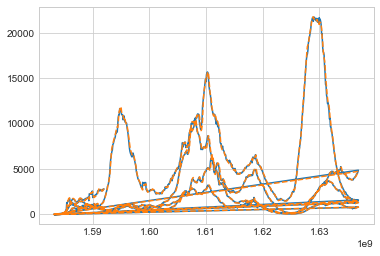

In [11]:
from sklearn.metrics import accuracy_score
print('Model vs training data (error)')
dataTrainingPredY = model.predict(dataTrainingX)
plt.plot(dataTrainingTimestamps, dataTrainingY, '-', dataTrainingTimestamps, dataTrainingPredY, '--')
#print("accuracy_score", accuracy_score(dataTrainingY, dataTrainingPredY))

Model vs test data (error)


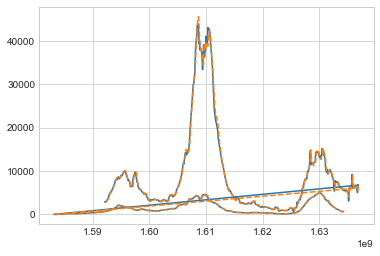

In [12]:
from sklearn.metrics import accuracy_score
print('Model vs test data (error)')
dataTestPredY = model.predict(dataTestX)
plt.plot(dataTestTimestamps, dataTestY, '-', dataTestTimestamps, dataTestPredY, '--')
#print("accuracy_score", accuracy_score(dataTestY, dataTestPredY))